In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Load food production and consumption datasets
food_production = pd.read_csv(r"C:\Users\DELL\Downloads\Africa Food Production (2004 - 2013).csv")
food_supply = pd.read_csv(r"C:\Users\DELL\Downloads\Africa Food Supply (2004 - 2013).csv")


In [2]:
print(food_production)
print(food_supply)

        Country                Item  Year  Value
0       Algeria  Wheat and products  2004   2731
1       Algeria  Wheat and products  2005   2415
2       Algeria  Wheat and products  2006   2688
3       Algeria  Wheat and products  2007   2319
4       Algeria  Wheat and products  2008   1111
...         ...                 ...   ...    ...
23105  Zimbabwe         Crustaceans  2009      0
23106  Zimbabwe         Crustaceans  2010      0
23107  Zimbabwe         Crustaceans  2011      0
23108  Zimbabwe         Crustaceans  2012      0
23109  Zimbabwe         Crustaceans  2013      0

[23110 rows x 4 columns]
      Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]


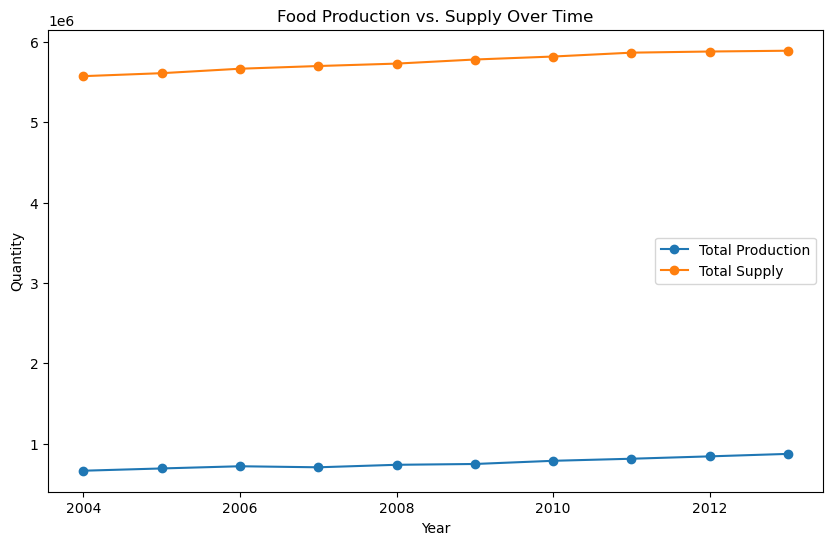

In [3]:
# Merge datasets on common columns (Country and Year)
merged_data = pd.merge(food_production, food_supply, on=['Country', 'Year'])

# Group data by year to get an overview of total production and supply
production_by_year = merged_data.groupby('Year')['Value_x'].sum()
supply_by_year = merged_data.groupby('Year')['Value_y'].sum()

# Visualize production and supply trends over the years
plt.figure(figsize=(10, 6))
plt.plot(production_by_year.index, production_by_year.values, label='Total Production', marker='o')
plt.plot(supply_by_year.index, supply_by_year.values, label='Total Supply', marker='o')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Food Production vs. Supply Over Time')
plt.legend()
plt.show()


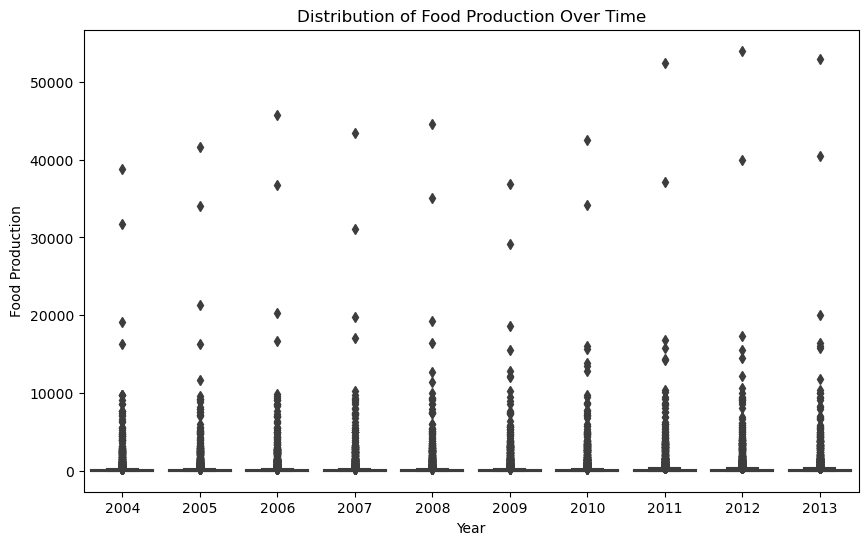

In [4]:
# Calculate average and median food production
average_production = merged_data.groupby('Year')['Value_x'].mean()
median_production = merged_data.groupby('Year')['Value_x'].median()

# Distribution of Food Production Over the Years
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Value_x', data=merged_data)
plt.xlabel('Year')
plt.ylabel('Food Production')
plt.title('Distribution of Food Production Over Time')
plt.show()


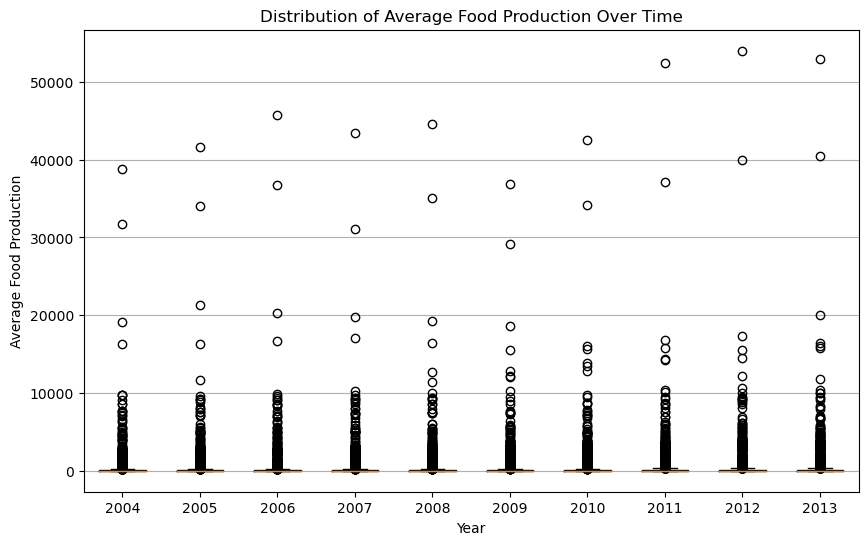

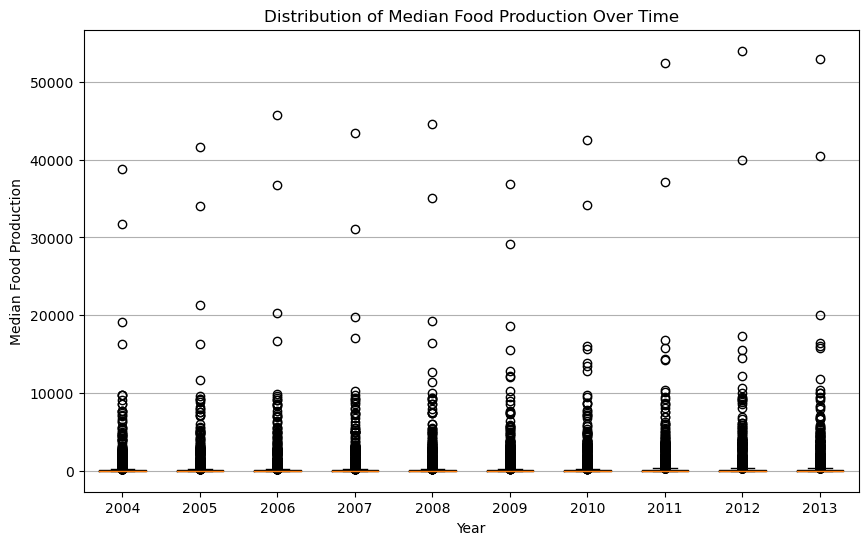

In [5]:
#  Average food production Over Time
plt.figure(figsize=(10, 6))
for year in average_production.index:
    values = merged_data.loc[merged_data['Year'] == year, 'Value_x']
    plt.boxplot(values, positions=[year], widths=0.6)
plt.xlabel('Year')
plt.ylabel('Average Food Production')
plt.title('Distribution of Average Food Production Over Time')
plt.xticks(average_production.index)
plt.grid(True, axis='y')
plt.show()


# Median Food Production Over Time
plt.figure(figsize=(10, 6))
for year in median_production.index:
    values = merged_data.loc[merged_data['Year'] == year, 'Value_x']
    plt.boxplot(values, positions=[year], widths=0.6)
plt.xlabel('Year')
plt.ylabel('Median Food Production')
plt.title('Distribution of Median Food Production Over Time')
plt.xticks(median_production.index)
plt.grid(True, axis='y')
plt.show()


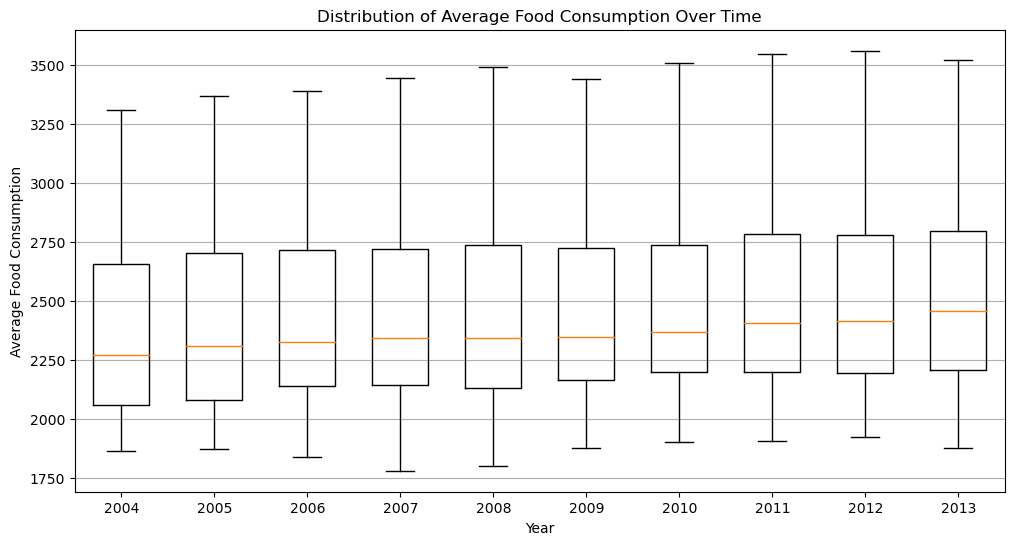

<Figure size 1000x600 with 0 Axes>

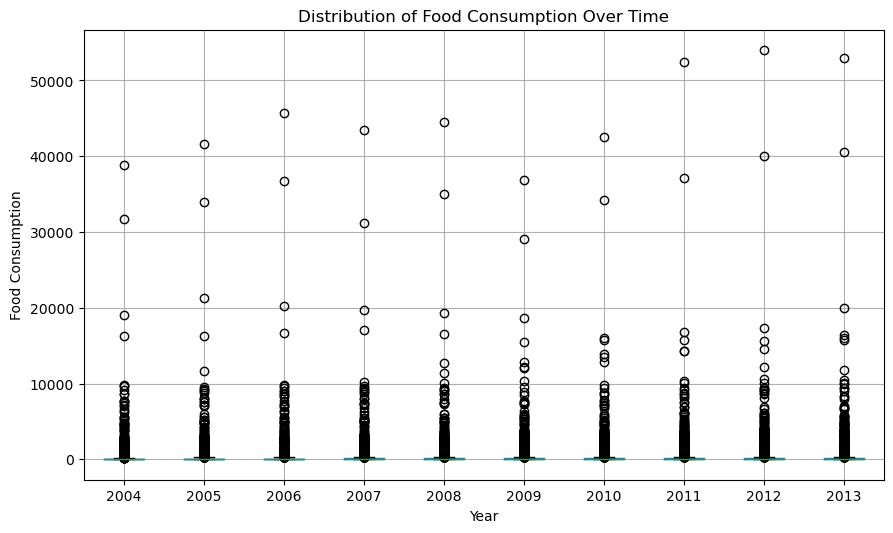

In [6]:

# Calculate average food consumption per year
average_consumption = merged_data.groupby('Year')['Value_y'].mean()

# Create separate boxplots for average food consumption per year
plt.figure(figsize=(12, 6))
for year in average_consumption.index:
    values = merged_data.loc[merged_data['Year'] == year, 'Value_y']
    plt.boxplot(values, positions=[year], widths=0.6)
plt.xlabel('Year')
plt.ylabel('Average Food Consumption')
plt.title('Distribution of Average Food Consumption Over Time')
plt.xticks(average_consumption.index)
plt.grid(True, axis='y')
plt.show()


# Distribution of Food Consumption Over Time
plt.figure(figsize=(10, 6))
merged_data.boxplot(column='Value_x', by='Year', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Food Consumption')
plt.title('Distribution of Food Consumption Over Time')
plt.suptitle('') 
plt.show()



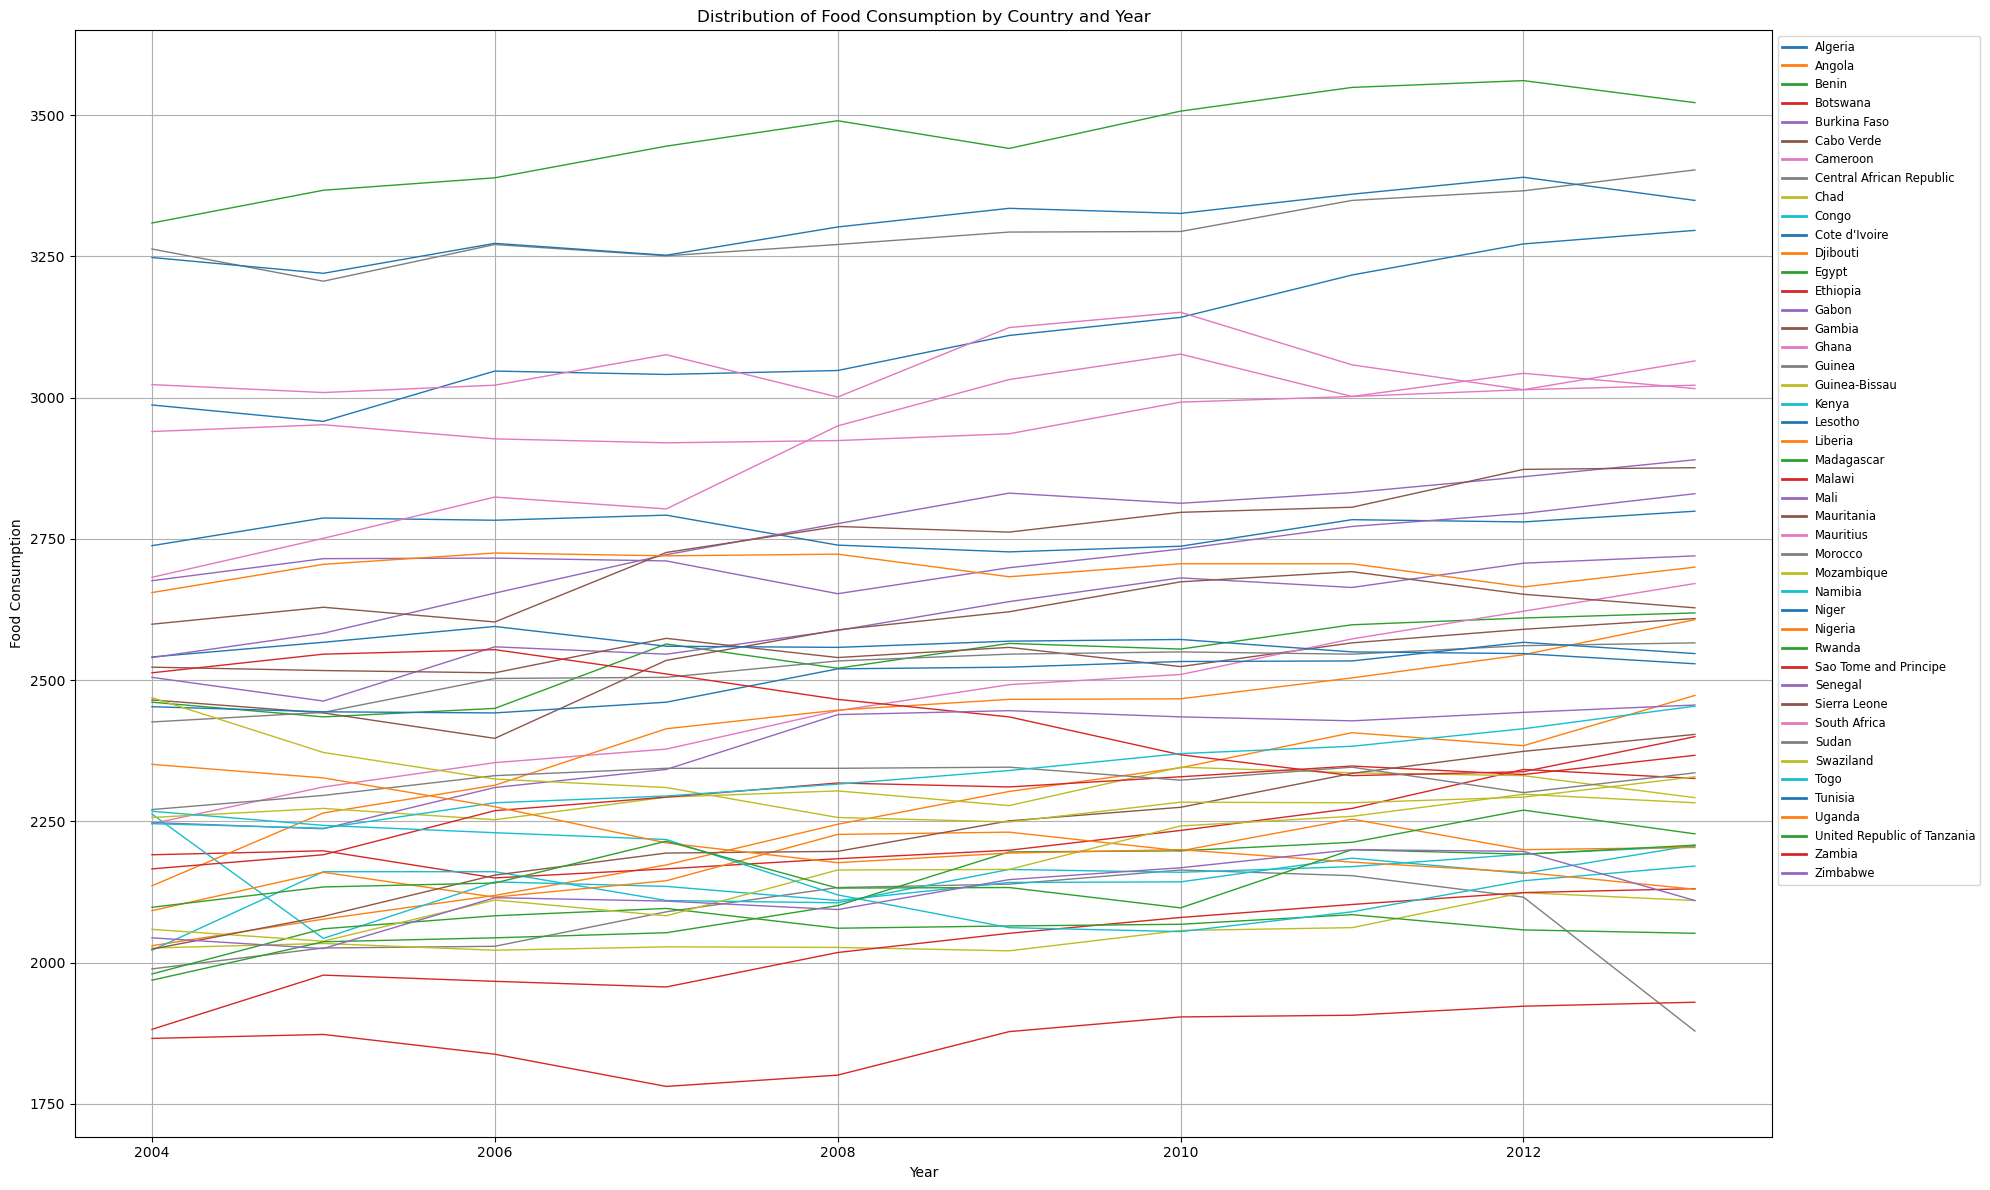

In [8]:

# Calculate average food consumption by country and year
average_consumption_country_year = merged_data.groupby(['Country', 'Year'])['Value_y'].mean().reset_index()

# Plotting average food consumption using a line graph for each country
plt.figure(figsize=(20, 12))  # Larger figure size for improved visibility

# Create empty lists to hold legend handles and labels
legend_handles = []
legend_labels = []

# Loop through each country to plot its consumption over years and create custom legend
for country in average_consumption_country_year['Country'].unique():
    country_data = average_consumption_country_year[average_consumption_country_year['Country'] == country]
    line, = plt.plot(country_data['Year'], country_data['Value_y'], label=country, linestyle='-', linewidth=1)
    legend_handles.append(Line2D([0], [0], color=line.get_color(), linewidth=2))
    legend_labels.append(country)

# Display the legend with custom legend handles and labels
plt.legend(legend_handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

plt.xlabel('Year')
plt.ylabel('Food Consumption')
plt.title('Distribution of Food Consumption by Country and Year')
plt.grid(True)
plt.tight_layout()
plt.show()

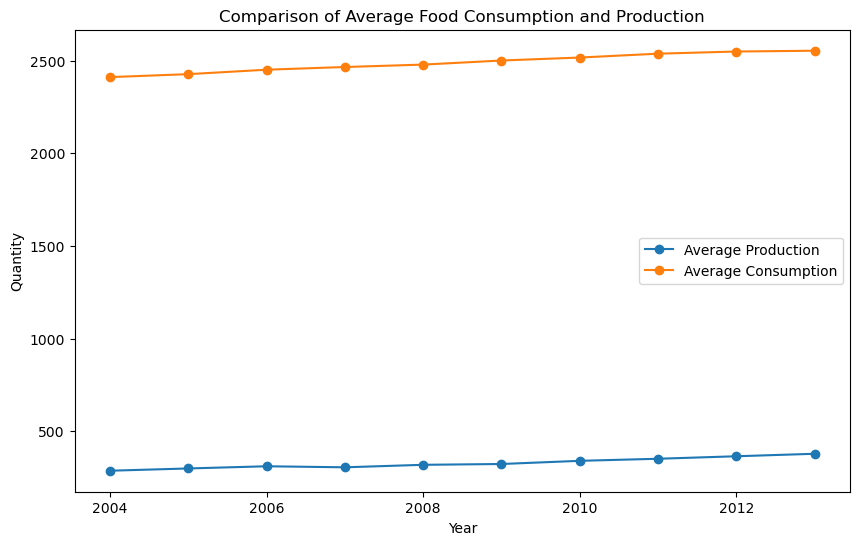

In [9]:
# Calculate average food consumption
average_consumption = merged_data.groupby('Year')['Value_y'].mean()

# Comparison between average consumption and production
plt.figure(figsize=(10, 6))
plt.plot(average_production.index, average_production.values, label='Average Production', marker='o')
plt.plot(average_consumption.index, average_consumption.values, label='Average Consumption', marker='o')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Comparison of Average Food Consumption and Production')
plt.legend()
plt.show()


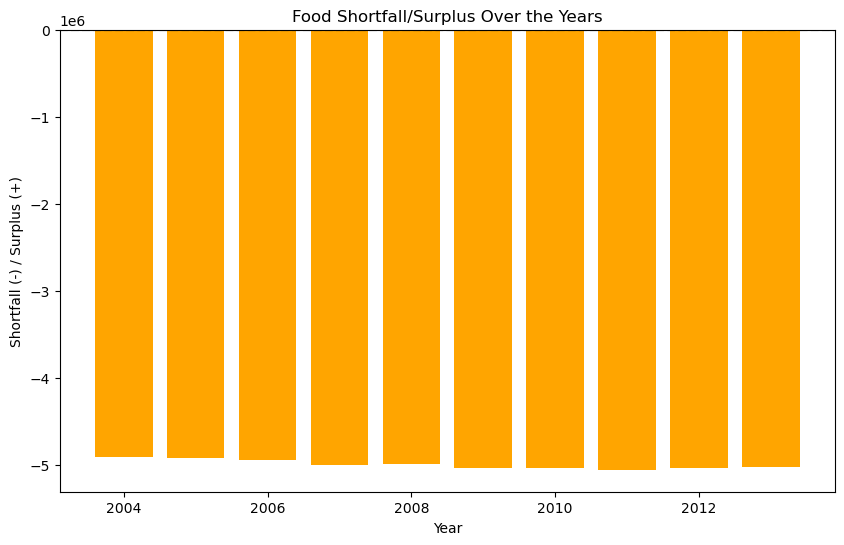

In 2011, there was a significant shortfall of -5054532 units.
Countries with the most significant shortfall: ['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Cabo Verde'
 'Cameroon' 'Central African Republic' 'Chad' 'Congo' "Cote d'Ivoire"
 'Djibouti' 'Egypt' 'Ethiopia' 'Gabon' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia' 'Niger'
 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Sierra Leone'
 'South Africa' 'Sudan' 'Swaziland' 'Togo' 'Tunisia' 'Uganda'
 'United Republic of Tanzania' 'Zambia' 'Zimbabwe']
Items contributing to the shortfall: ['Wheat and products' 'Rice (Milled Equivalent)' 'Barley and products'
 'Maize and products' 'Oats' 'Sorghum and products' 'Cereals, Other'
 'Sugar beet' 'Sugar (Raw Equivalent)' 'Honey' 'Beans' 'Peas'
 'Pulses, Other and products' 'Nuts and products'
 'Groundnuts (Shelled Eq)' 'Sunflower seed' 'Rape and Mustardseed'
 'Cottons

In [10]:
# Calculate the shortfall or surplus between production and supply
shortfall_surplus = production_by_year - supply_by_year

# Visualize the shortfall or surplus
plt.figure(figsize=(10, 6))
plt.bar(shortfall_surplus.index, shortfall_surplus.values, color='orange')
plt.xlabel('Year')
plt.ylabel('Shortfall (-) / Surplus (+)')
plt.title('Food Shortfall/Surplus Over the Years')
plt.axhline(0, color='black', linestyle='--')  # Adding a line at 0 for reference
plt.show()

# Identify countries and items with significant shortfalls
max_shortfall_year = shortfall_surplus.idxmin()
max_shortfall_value = shortfall_surplus.min()

max_shortfall_countries = merged_data[merged_data['Year'] == max_shortfall_year]['Country']
max_shortfall_items = merged_data[(merged_data['Year'] == max_shortfall_year) &
                                  (merged_data['Value_x'] - merged_data['Value_y'] < 0)]['Item']

print(f"In {max_shortfall_year}, there was a significant shortfall of {max_shortfall_value} units.")
print("Countries with the most significant shortfall:", max_shortfall_countries.unique())
print("Items contributing to the shortfall:", max_shortfall_items.unique())


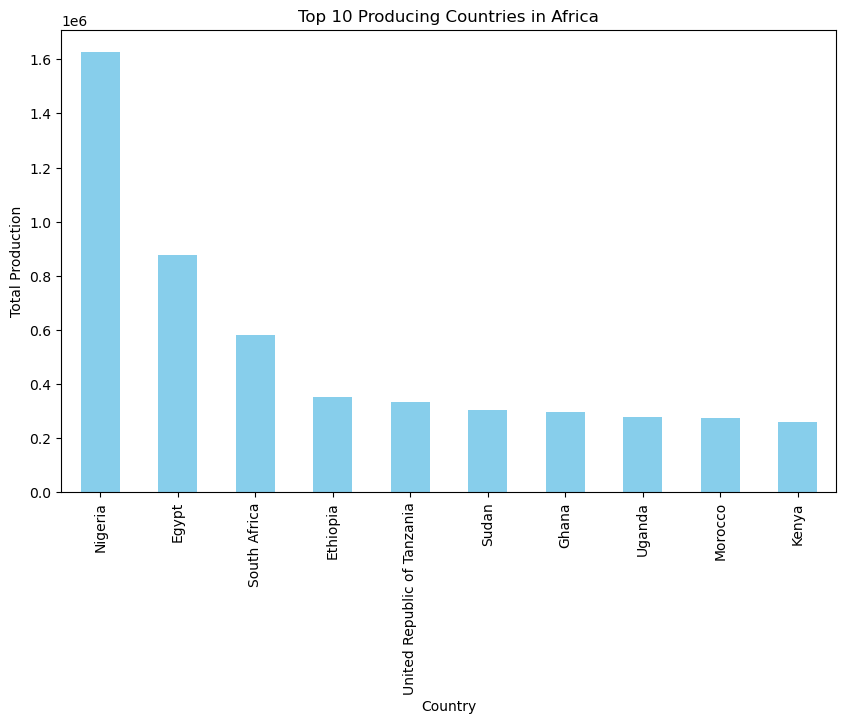

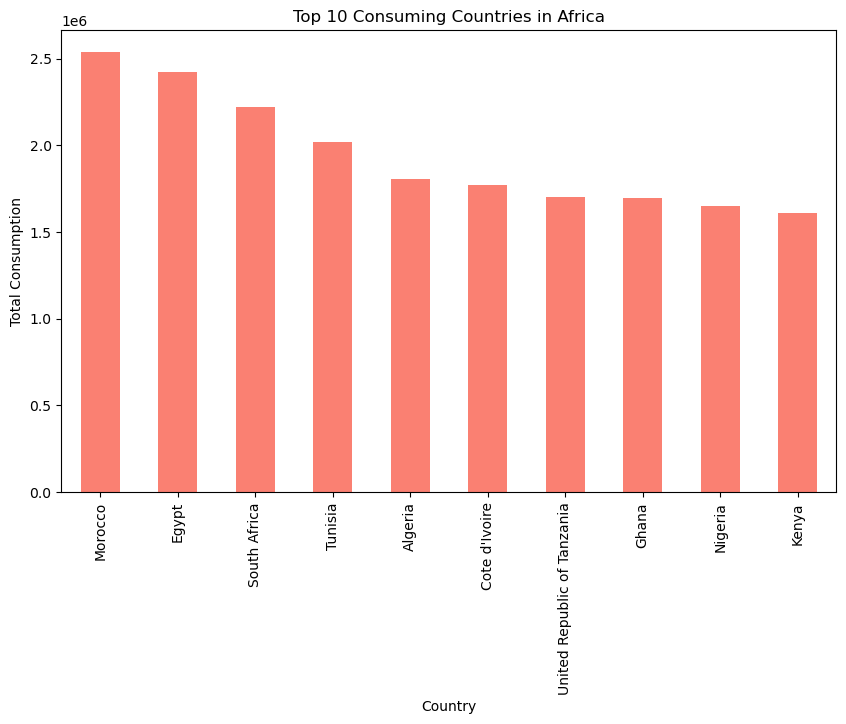

In [11]:
# Calculate total production and consumption per country
total_production_per_country = merged_data.groupby('Country')['Value_x'].sum()
total_consumption_per_country = merged_data.groupby('Country')['Value_y'].sum()

# Visualize top producing countries
top_producing_countries = total_production_per_country.nlargest(10)
plt.figure(figsize=(10, 6))
top_producing_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Production')
plt.title('Top 10 Producing Countries in Africa')
plt.show()

# Visualize top consuming countries
top_consuming_countries = total_consumption_per_country.nlargest(10)
plt.figure(figsize=(10, 6))
top_consuming_countries.plot(kind='bar', color='salmon')
plt.xlabel('Country')
plt.ylabel('Total Consumption')
plt.title('Top 10 Consuming Countries in Africa')
plt.show()


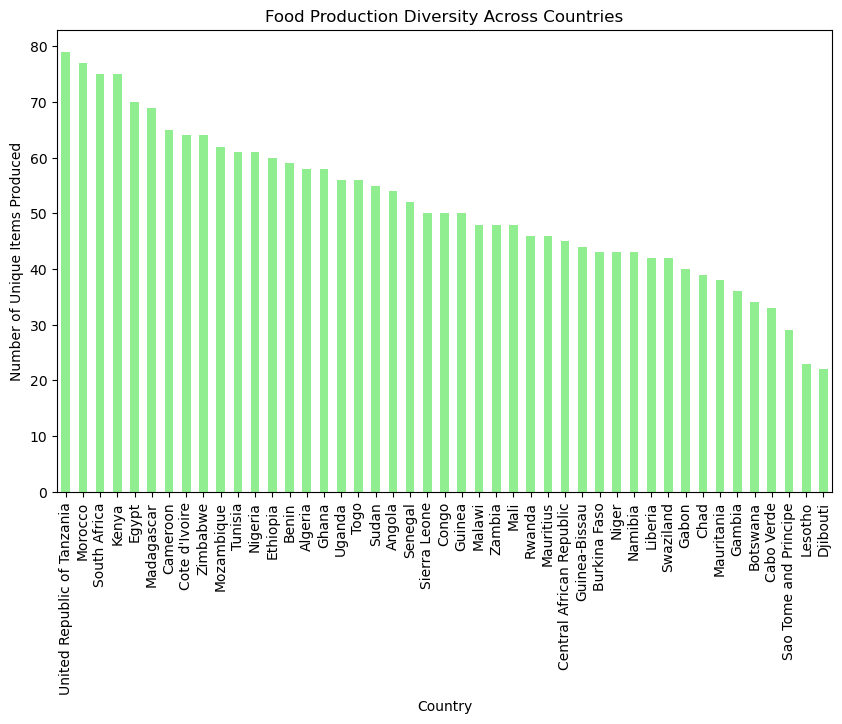

In [12]:
# Count unique items produced per country
unique_items_per_country = merged_data.groupby('Country')['Item'].nunique()

# Visualize the diversity of items produced
plt.figure(figsize=(10, 6))
unique_items_per_country.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.xlabel('Country')
plt.ylabel('Number of Unique Items Produced')
plt.title('Food Production Diversity Across Countries')
plt.show()


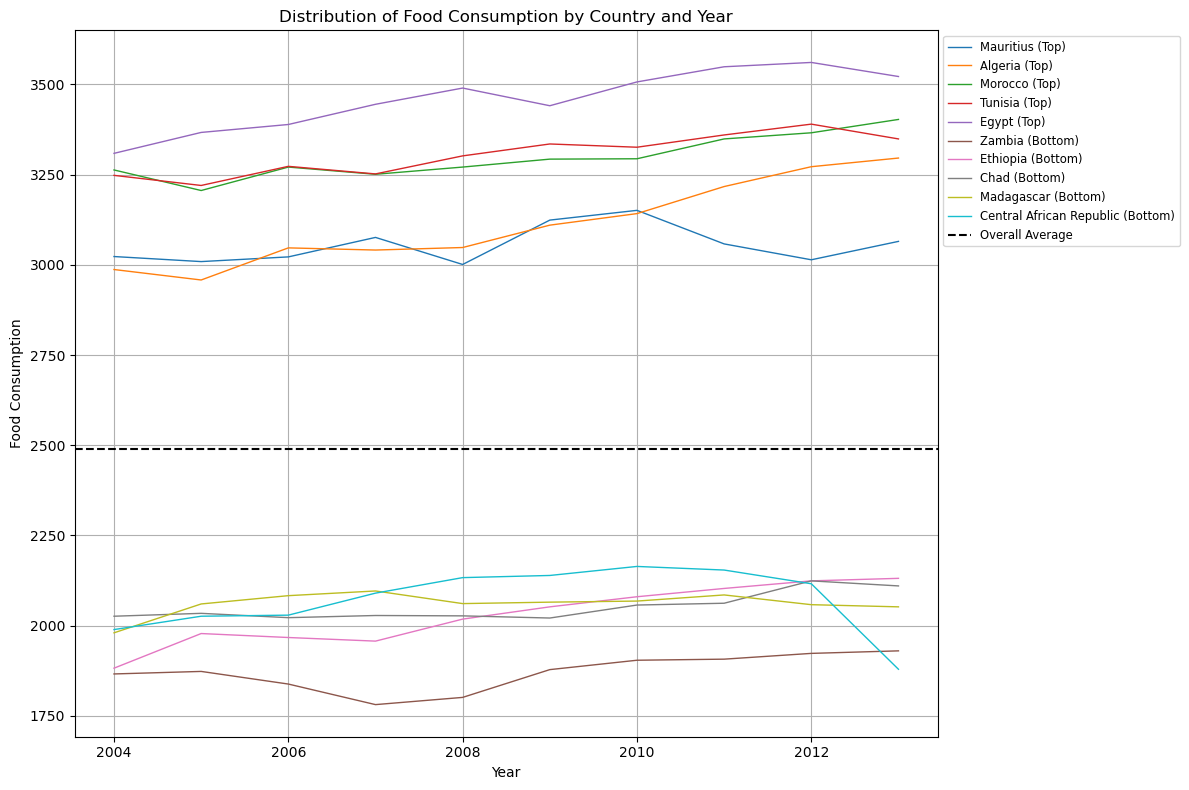

In [13]:
# Calculate average food consumption for each country across all years
average_consumption_per_country = merged_data.groupby('Country')['Value_y'].mean().sort_values()

# Identify countries with highest and lowest average consumption
top_countries = average_consumption_per_country.tail(5)  # Adjust the number to display more or fewer countries
bottom_countries = average_consumption_per_country.head(5)  # Similarly, adjust to display different countries

# Calculate overall average food consumption across all countries and years
overall_average_consumption = merged_data['Value_y'].mean()

# Plotting average food consumption for the identified top and bottom countries
plt.figure(figsize=(12, 8))

# Plot top countries
for country in top_countries.index:
    country_data = average_consumption_country_year[average_consumption_country_year['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value_y'], label=country + ' (Top)', linestyle='-', linewidth=1)

# Plot bottom countries
for country in bottom_countries.index:
    country_data = average_consumption_country_year[average_consumption_country_year['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value_y'], label=country + ' (Bottom)', linestyle='-', linewidth=1)

# Plot overall average as a horizontal line
plt.axhline(y=overall_average_consumption, color='black', linestyle='--', label='Overall Average')

plt.xlabel('Year')
plt.ylabel('Food Consumption')
plt.title('Distribution of Food Consumption by Country and Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()
